In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim.lr_scheduler as lr_scheduler
from torchvision import transforms, utils, models
from torch.utils.data import Dataset, DataLoader

In [4]:
from synthetic_utils import *

In [5]:
from trainer import *
from networks import *
from losses import *

In [6]:
if torch.cuda.is_available():
    device="cuda"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    device="cpu"
    torch.set_default_tensor_type('torch.FloatTensor')
print(device)

cuda


In [7]:
DATA_PATH = 'generated_data.pkl'
TRAIN_PATH = 'gen_train.pkl'
VAL_PATH = 'gen_val.pkl'
TEST_PATH = 'gen_test.pkl'

In [8]:
with open(TRAIN_PATH, 'rb') as f:
    imgs_train, shapes_train, colors_train = pickle.load(f)

In [9]:
with open(VAL_PATH, 'rb') as f:
    imgs_val, shapes_val, colors_val = pickle.load(f)

In [10]:
with open(TEST_PATH, 'rb') as f:
    imgs_test, shapes_test, colors_test = pickle.load(f)

In [11]:
imgs_train.shape, imgs_val.shape, imgs_test.shape, shapes_train.shape, shapes_val.shape, shapes_test.shape, colors_train.shape, colors_val.shape, colors_test.shape

((40000, 96, 96, 3),
 (5000, 96, 96, 3),
 (5000, 96, 96, 3),
 (40000, 1),
 (5000, 1),
 (5000, 1),
 (40000, 1),
 (5000, 1),
 (5000, 1))

In [12]:
imgs_train = imgs_train[:5000]
colors_train = colors_train[:5000]
shapes_train = shapes_train[:5000]

imgs_val = imgs_val[:500]
colors_val = colors_val[:500]
shapes_val = shapes_val[:500]

In [13]:
shapes_train = shapes_train.squeeze()
shapes_val = shapes_val.squeeze()
shapes_test = shapes_test.squeeze()
colors_train = colors_train.squeeze()
colors_val = colors_val.squeeze()
colors_test = colors_test.squeeze()

## Train only encoder first

In [14]:
encoder = LeNet()
classifier = ClassNet()

In [15]:
criterion = nn.BCELoss()
opt_cls = optim.Adam(classifier.parameters(), lr=0.001, betas=(0.9, 0.999))
opt_enc = optim.Adam(encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [16]:
num_epochs = 100
train_losses = []
train_accs = []
val_losses = []
val_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        train_loss, train_acc = train_encoder_classifier_epoch(encoder,
                                classifier, imgs_train, shapes_train, opt_enc,
                                opt_cls, criterion, device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(encoder, classifier,
                                imgs_val, shapes_val, criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.026 (0.026)	Loss 0.6887 (0.6887)	Accuracy 0.5625 (0.5625)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [20/78]	Time 0.017 (0.018)	Loss 0.7331 (0.6956)	Accuracy 0.4219 (0.5015)
Batch: [40/78]	Time 0.016 (0.017)	Loss 0.6934 (0.6953)	Accuracy 0.5000 (0.4947)
Batch: [60/78]	Time 0.016 (0.017)	Loss 0.6889 (0.6914)	Accuracy 0.5312 (0.5090)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.1674 (0.1674)	Accuracy 1.0000 (1.0000)
Avg validation loss: 0.17269469845294952 	 Accuracy: 0.982
--------------------
Epoch 0/100	Time 1.332 sec (1.332 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.1840 (0.1840)	Accuracy 0.9844 (0.9844)
Batch: [20/78]	Time 0.016 (0.016)	Loss 0.0005 (0.0537)	Accuracy 1.0000 (0.9859)
Batch: [40/78]	Time 0.016 (0.016)	Loss 0.0096 (0.0504)	Accuracy 1.0000 (0.9821)
Batch: [60/78]	Time 0.016 (0.016)	Loss 0.0123 (0.0364)	Accuracy 1.0000 (0.9872)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.0016 (0.0016)	Accuracy 1.0000 (1.0000)
Avg validation loss: 0.007790346849476919 	 Accuracy: 0.998
--------------------
Epoch 1/100	Time 1.288 sec (1.310 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.0036 (0.0036)	Accuracy 1.0000 (1.0000)
Batch: [20/78]	Time 0.016 (0.015)	Loss 0.0007 (0.0021)	Accuracy 1.0000 (1.0000)
Batch: [40/78]	Time 0.016 (0.016)	Loss 

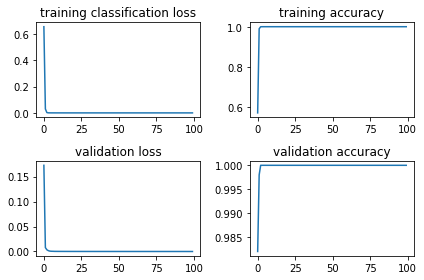

In [17]:
plt.subplot(221)
plt.title('training classification loss')
plt.plot(train_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(train_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(val_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(val_accs)
plt.tight_layout()

In [18]:
with open('plot_data/eo/onlycls.pkl', 'wb+') as f:
    pickle.dump([train_losses, train_accs, val_losses, val_accs], f)

## Train only adversary

In [19]:
adv_encoder = LeNet()
adversary = ClassNet()

In [20]:
adv_criterion = nn.BCELoss()
opt_adv = optim.Adam(adversary.parameters(), lr=0.001, betas=(0.9, 0.999))
opt_adv_enc = optim.Adam(adv_encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [21]:
num_epochs = 100
atrain_losses = []
atrain_accs = []
aval_losses = []
aval_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        train_loss, train_acc = train_encoder_classifier_epoch(adv_encoder,
                                adversary, imgs_train, colors_train, opt_adv_enc,
                                opt_adv, adv_criterion, device)
        atrain_losses.append(train_loss)
        atrain_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(adv_encoder, adversary,
                                imgs_val, colors_val, adv_criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        aval_losses.append(val_loss)
        aval_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.011 (0.011)	Loss 0.6935 (0.6935)	Accuracy 0.5156 (0.5156)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [20/78]	Time 0.016 (0.017)	Loss 0.1567 (0.4909)	Accuracy 0.9375 (0.7440)
Batch: [40/78]	Time 0.016 (0.016)	Loss 0.0256 (0.2935)	Accuracy 1.0000 (0.8579)
Batch: [60/78]	Time 0.016 (0.016)	Loss 0.0135 (0.2021)	Accuracy 1.0000 (0.9037)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.0006 (0.0006)	Accuracy 1.0000 (1.0000)
Avg validation loss: 0.0013779716613644267 	 Accuracy: 1.0
--------------------
Epoch 0/100	Time 1.318 sec (1.318 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.0016 (0.0016)	Accuracy 1.0000 (1.0000)
Batch: [20/78]	Time 0.016 (0.016)	Loss 0.0001 (0.0007)	Accuracy 1.0000 (1.0000)
Batch: [40/78]	Time 0.016 (0.016)	Loss 0.0012 (0.0008)	Accuracy 1.0000 (1.0000)
Batch: [60/78]	Time 0.016 (0.016)	Loss 0.0022 (0.0007)	Accuracy 1.0000 (1.0000)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.0001 (0.0001)	Accuracy 1.0000 (1.0000)
Avg validation loss: 0.001023914364842767 	 Accuracy: 1.0
--------------------
Epoch 1/100	Time 1.298 sec (1.308 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.007 (0.007)	Loss 0.0002 (0.0002)	Accuracy 1.0000 (1.0000)
Batch: [20/78]	Time 0.016 (0.016)	Loss 0.0000 (0.0001)	Accuracy 1.0000 (1.0000)
Batch: [40/78]	Time 0.016 (0.016)	Loss 0.

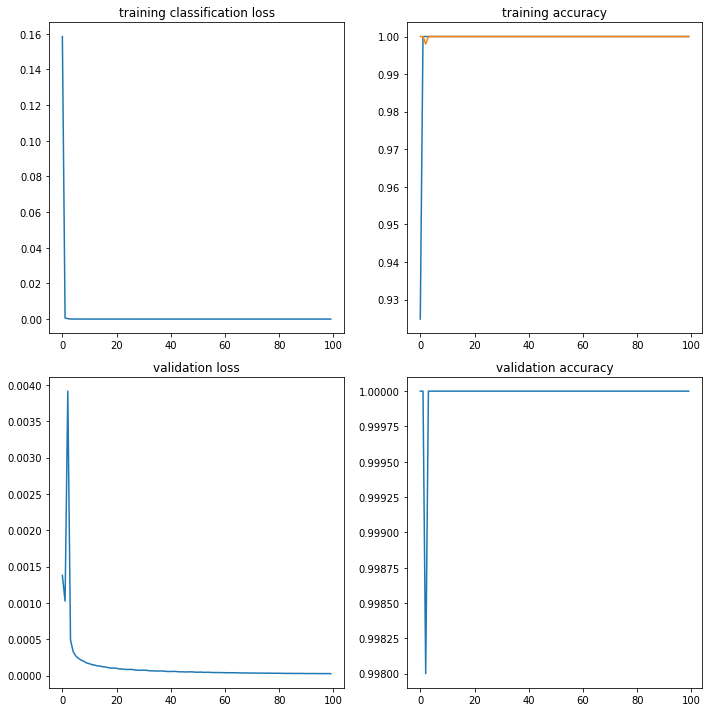

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('training classification loss')
plt.plot(atrain_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(atrain_accs)
plt.plot(aval_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(aval_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(aval_accs)
plt.tight_layout()

In [23]:
with open('plot_data/eo/onlyadv.pkl', 'wb') as f:
    pickle.dump([atrain_losses, atrain_accs, aval_losses, aval_accs], f)

## Train adversary on original encoder

In [24]:
fixenc_adversary = ClassNet()
fixenc_adv_criterion = nn.BCELoss()
fixenc_opt_adv = optim.Adam(fixenc_adversary.parameters(), lr=0.001, betas=(0.9, 0.999))

In [25]:
num_epochs = 100
fatrain_losses = []
fatrain_accs = []
faval_losses = []
faval_accs = []
epoch_time = AverageMeter()
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
#         scheduler_cls.step()
#         scheduler_enc.step()
        # train
        
        train_loss, train_acc = train_classifier_epoch(encoder, fixenc_adversary, 
                                                       imgs_train, colors_train, 
                                                       fixenc_opt_adv, fixenc_adv_criterion, 
                                                       device)
        fatrain_losses.append(train_loss)
        fatrain_accs.append(train_acc)
        # validate
        print('-'*10)
        val_loss, val_acc = validate_encoder_classifier_epoch(encoder, fixenc_adversary,
                                imgs_val, colors_val, fixenc_adv_criterion, device)

        print('Avg validation loss: {} \t Accuracy: {}'.format(val_loss, val_acc))
        faval_losses.append(val_loss)
        faval_accs.append(val_acc)
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/100
Batch: [0/78]	Time 0.006 (0.006)	Loss 0.6900 (0.6900)	Accuracy 0.5156 (0.5156)
Batch: [20/78]	Time 0.006 (0.006)	Loss 0.7075 (0.7075)	Accuracy 0.5000 (0.4881)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [40/78]	Time 0.006 (0.006)	Loss 0.6875 (0.7026)	Accuracy 0.5625 (0.4859)
Batch: [60/78]	Time 0.006 (0.006)	Loss 0.7017 (0.7015)	Accuracy 0.4844 (0.4864)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.6771 (0.6771)	Accuracy 0.5938 (0.5938)
Avg validation loss: 0.6999087495803833 	 Accuracy: 0.528
--------------------
Epoch 0/100	Time 0.504 sec (0.504 sec)
--------------------
Epoch: 1/100
Batch: [0/78]	Time 0.005 (0.005)	Loss 0.7033 (0.7033)	Accuracy 0.4844 (0.4844)
Batch: [20/78]	Time 0.005 (0.006)	Loss 0.6993 (0.7043)	Accuracy 0.5156 (0.4829)
Batch: [40/78]	Time 0.006 (0.006)	Loss 0.6883 (0.7003)	Accuracy 0.5625 (0.4977)
Batch: [60/78]	Time 0.006 (0.006)	Loss 0.7037 (0.7003)	Accuracy 0.3906 (0.4923)
----------
Test: [0/7]	Time 0.004 (0.004)	Loss 0.6790 (0.6790)	Accuracy 0.5938 (0.5938)
Avg validation loss: 0.694610869884491 	 Accuracy: 0.528
--------------------
Epoch 1/100	Time 0.506 sec (0.505 sec)
--------------------
Epoch: 2/100
Batch: [0/78]	Time 0.005 (0.005)	Loss 0.7014 (0.7014)	Accuracy 0.4844 (0.4844)
Batch: [20/78]	Time 0.006 (0.006)	Loss 0.6952 (0.7004)	Accuracy 0.5000 (0.4874)
Batch: [40/78]	Time 0.005 (0.006)	Loss 0.68

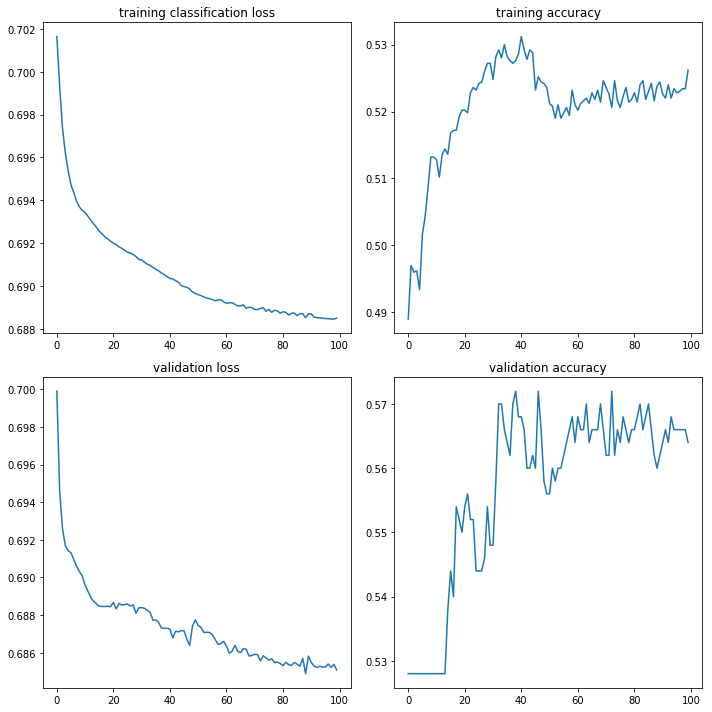

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('training classification loss')
plt.plot(fatrain_losses)
plt.subplot(222)
plt.title('training accuracy')
plt.plot(fatrain_accs)
plt.subplot(223)
plt.title('validation loss')
plt.plot(faval_losses)
plt.subplot(224)
plt.title('validation accuracy')
plt.plot(faval_accs)
plt.tight_layout()

In [27]:
with open('plot_data/eo/fixenc_adv.pkl', 'wb') as f:
    pickle.dump([fatrain_losses, fatrain_accs, faval_losses, faval_accs], f)

## LAFTR Training

In [28]:
laftr_encoder = LeNet()
laftr_adversary = ClassNet()
laftr_classifier = ClassNet()

In [29]:
laftr_adv_criterion = AdvEqOddsLoss(p=1)
laftr_cls_criterion = nn.BCELoss()

In [30]:
laftr_opt_adv = optim.Adam(laftr_adversary.parameters(), lr=0.001, betas=(0.9, 0.999))
laftr_opt_cls = optim.Adam(laftr_classifier.parameters(), lr=0.001, betas=(0.9, 0.999))
laftr_opt_enc = optim.Adam(laftr_encoder.parameters(), lr=0.001, betas=(0.9, 0.999))

In [31]:
num_epochs = 50

clsTrain_losses = []
clsTrain_accs = []
clsTrainCombined_losses = []
advTrain_losses = []
advTrain_accs = []
advTrainCombined_losses = []

combinedVal_losses = []
clsVal_losses = []
clsVal_accs = []
advVal_losses = []
advVal_accs = []

epoch_time = AverageMeter()

In [32]:
ep_end = time.time()
for epoch in range(0, num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs))
        
        cls_loss, cls_en_combinedLoss, cls_en_acc, adv_loss, adv_combinedLoss, adv_acc = laftr_epoch(
                                                        laftr_encoder, laftr_classifier, laftr_adversary, imgs_train,
                                                        shapes_train, colors_train, laftr_opt_enc, laftr_opt_cls, laftr_opt_adv, 
                                                        laftr_cls_criterion, laftr_adv_criterion, device)
        
        clsTrain_losses.append(cls_loss)
        clsTrain_accs.append(cls_en_acc)
        clsTrainCombined_losses.append(cls_en_combinedLoss)
        advTrain_losses.append(adv_loss)
        advTrain_accs.append(adv_acc)
        advTrainCombined_losses.append(adv_combinedLoss)
        
        print('Classifier accuracy: {}\t Adversary Accuracy: {}'.format(cls_en_acc, adv_acc))
        # validate
        print('-'*10)
        
        combinedVal_loss, clsVal_loss, clsVal_acc, advVal_loss, advVal_acc = laftr_validate(
                                                        laftr_encoder, laftr_classifier, laftr_adversary, imgs_val,
                                                        shapes_val, colors_val,laftr_cls_criterion, laftr_adv_criterion, device)
        
        combinedVal_losses.append(combinedVal_loss)
        clsVal_losses.append(clsVal_loss)
        clsVal_accs.append(clsVal_acc)
        advVal_losses.append(advVal_loss)
        advVal_accs.append(advVal_acc)
        
        print('Classifier validation acc: {:.4f} \t Adv validation acc: {:.4f}'.format(clsVal_acc, advVal_acc))
        
        print('-' * 20)
        epoch_time.update(time.time() - ep_end)
        ep_end = time.time()
        print('Epoch {}/{}\t'
              'Time {epoch_time.val:.3f} sec ({epoch_time.avg:.3f} sec)'.format(epoch, num_epochs, epoch_time=epoch_time))
        print('-'*20)

Epoch: 0/50
Batch: [0/78]	Time 0.042 (0.042)
Classifier loss 0.6914 (0.6914)	Adversary loss -0.0078 (-0.0078)
Combined Loss during classifier step 0.6913 (0.6913)	Combined Loss during adversary step -0.6787 (-0.6787)
Classifier Accuracy 0.5625 (0.5625)	Adversary Accuracy 0.4688 (0.4688)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Batch: [20/78]	Time 0.032 (0.032)
Classifier loss 0.6942 (0.6935)	Adversary loss -1.3208 (-0.6166)
Combined Loss during classifier step -0.1906 (0.2037)	Combined Loss during adversary step 0.6356 (-0.0744)
Classifier Accuracy 0.5312 (0.5290)	Adversary Accuracy 0.0312 (0.2433)
Batch: [40/78]	Time 0.029 (0.031)
Classifier loss 0.7433 (0.7056)	Adversary loss 0.0000 (-0.4510)
Combined Loss during classifier step 0.7433 (0.3806)	Combined Loss during adversary step -0.6997 (-0.2467)
Classifier Accuracy 0.5000 (0.5252)	Adversary Accuracy 0.4062 (0.3258)
Batch: [60/78]	Time 0.030 (0.031)
Classifier loss 0.7351 (0.7192)	Adversary loss 0.0001 (-0.3031)
Combined Loss during classifier step 0.7352 (0.5007)	Combined Loss during adversary step -0.7158 (-0.4051)
Classifier Accuracy 0.5156 (0.5251)	Adversary Accuracy 0.3906 (0.3776)


/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/s1791387/miniconda3/envs/fairness/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Classifier accuracy: 0.5168	 Adversary Accuracy: 0.4126
----------
Test batch: [0/7]	Time 0.009 (0.009)
Classifier loss 0.7051 (0.7051)	Adversary loss 0.0163 (0.0163)
Combined Loss 0.7214 (0.7214)	Classifier Accuracy 0.5000 (0.5000)	Adversary Accuracy 0.5938 (0.5938)
Classifier validation acc: 0.4900 	 Adv validation acc: 0.5280
--------------------
Epoch 0/50	Time 2.486 sec (2.486 sec)
--------------------
Epoch: 1/50
Batch: [0/78]	Time 0.030 (0.030)
Classifier loss 0.7285 (0.7285)	Adversary loss 0.0100 (0.0100)
Combined Loss during classifier step 0.7453 (0.7453)	Combined Loss during adversary step -0.7302 (-0.7302)
Classifier Accuracy 0.4375 (0.4375)	Adversary Accuracy 0.4844 (0.4844)
Batch: [20/78]	Time 0.030 (0.030)
Classifier loss 0.7089 (0.7021)	Adversary loss 0.0003 (0.0023)
Combined Loss during classifier step 0.7093 (0.7074)	Combined Loss during adversary step -0.6865 (-0.6993)
Classifier Accuracy 0.4844 (0.4940)	Adversary Accuracy 0.5000 (0.4985)
Batch: [40/78]	Time 0.029 (0

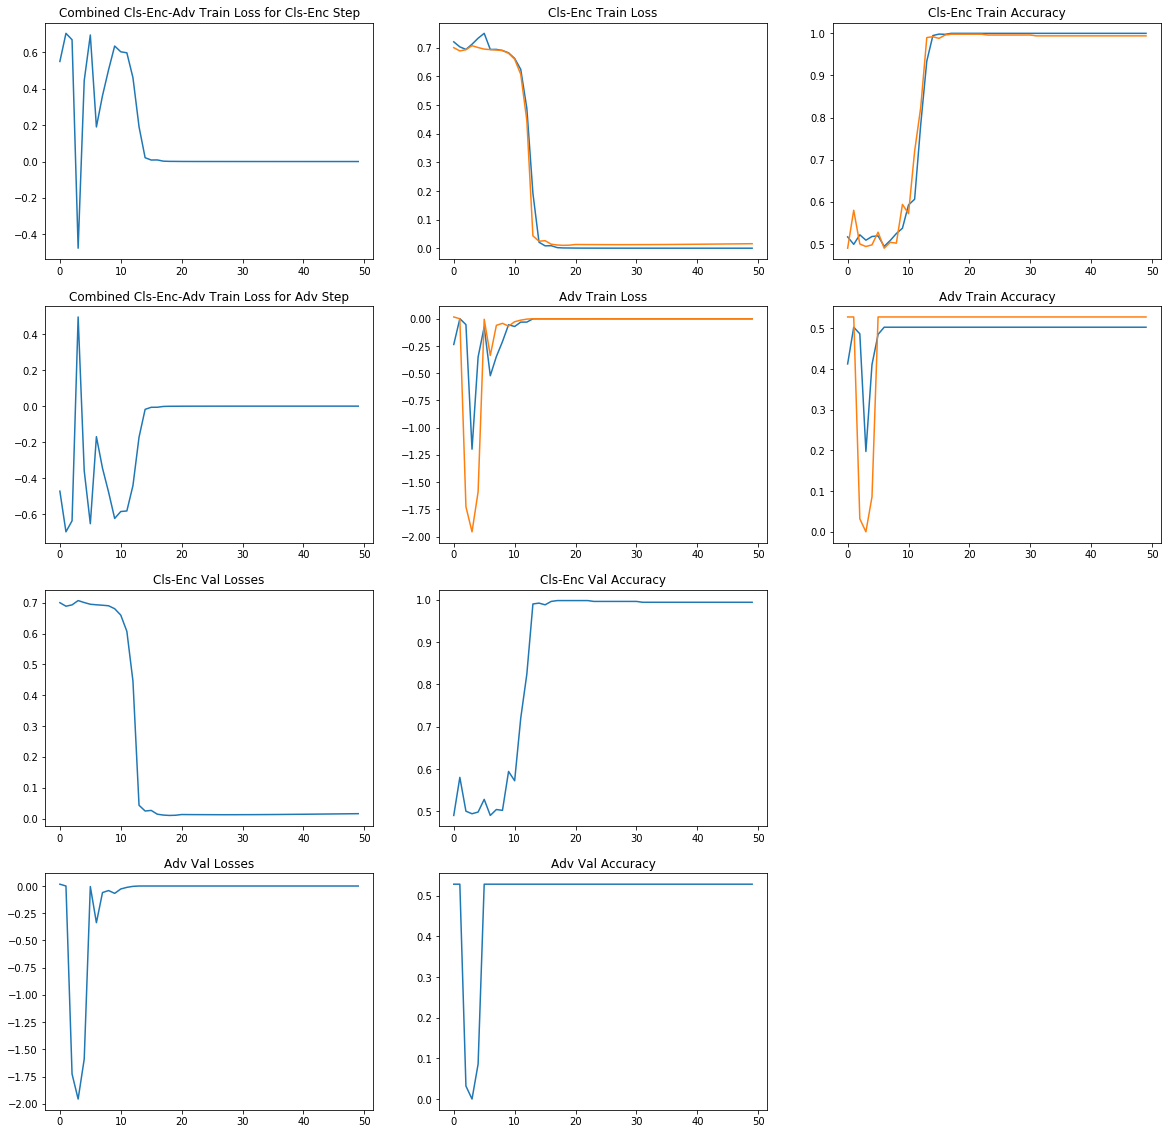

In [33]:
plt.figure(figsize=(20,20))
plt.subplot(431)
plt.title('Combined Cls-Enc-Adv Train Loss for Cls-Enc Step')
plt.plot(clsTrainCombined_losses)

plt.subplot(432)
plt.title('Cls-Enc Train Loss')
plt.plot(clsTrain_losses)
plt.plot(clsVal_losses)

plt.subplot(433)
plt.title('Cls-Enc Train Accuracy')
plt.plot(clsTrain_accs)
plt.plot(clsVal_accs)
plt.subplot(434)
plt.title('Combined Cls-Enc-Adv Train Loss for Adv Step')
plt.plot(advTrainCombined_losses)
plt.subplot(435)
plt.title('Adv Train Loss')
plt.plot(advTrain_losses)
plt.plot(advVal_losses)

plt.subplot(436)
plt.title('Adv Train Accuracy')
plt.plot(advTrain_accs)
plt.plot(advVal_accs)

plt.subplot(437)
plt.title('Cls-Enc Val Losses')
plt.plot(clsVal_losses)
plt.subplot(438)
plt.title('Cls-Enc Val Accuracy')
plt.plot(clsVal_accs)
plt.subplot(4,3,10)
plt.title('Adv Val Losses')
plt.plot(advVal_losses)
plt.subplot(4,3,11)
plt.title('Adv Val Accuracy')
plt.plot(advVal_accs)

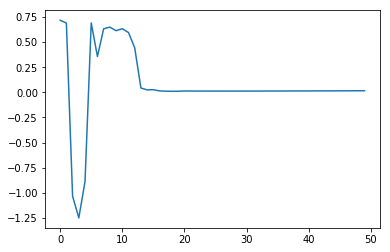

In [34]:
plt.plot(combinedVal_losses)

In [35]:
# with open('plot_data/eo/laftr_p2_100.pkl', 'wb') as f:
#     pickle.dump([clsTrain_accs, clsTrainCombined_losses, 
#                  clsTrain_losses, advTrain_losses, 
#                  advTrain_accs, advTrainCombined_losses,
#                  combinedVal_losses, clsVal_losses,
#                  clsVal_accs, advVal_losses, advVal_accs], f)